인공지능학과 기말프로젝트 (2277007 김수진, 2277021 오유진) 

# [ GNI Clustering 및 연도 중심 분석 ]

## 0. Dataset
G&I Webscrapping(week6) 를 통해 url 주소패턴을 관찰한 바 있다.
이를 이용해 2013년부터 2022년까지 작성된 논문들을 'Genomics&Informatics'사이트에서 html로 받아온다.

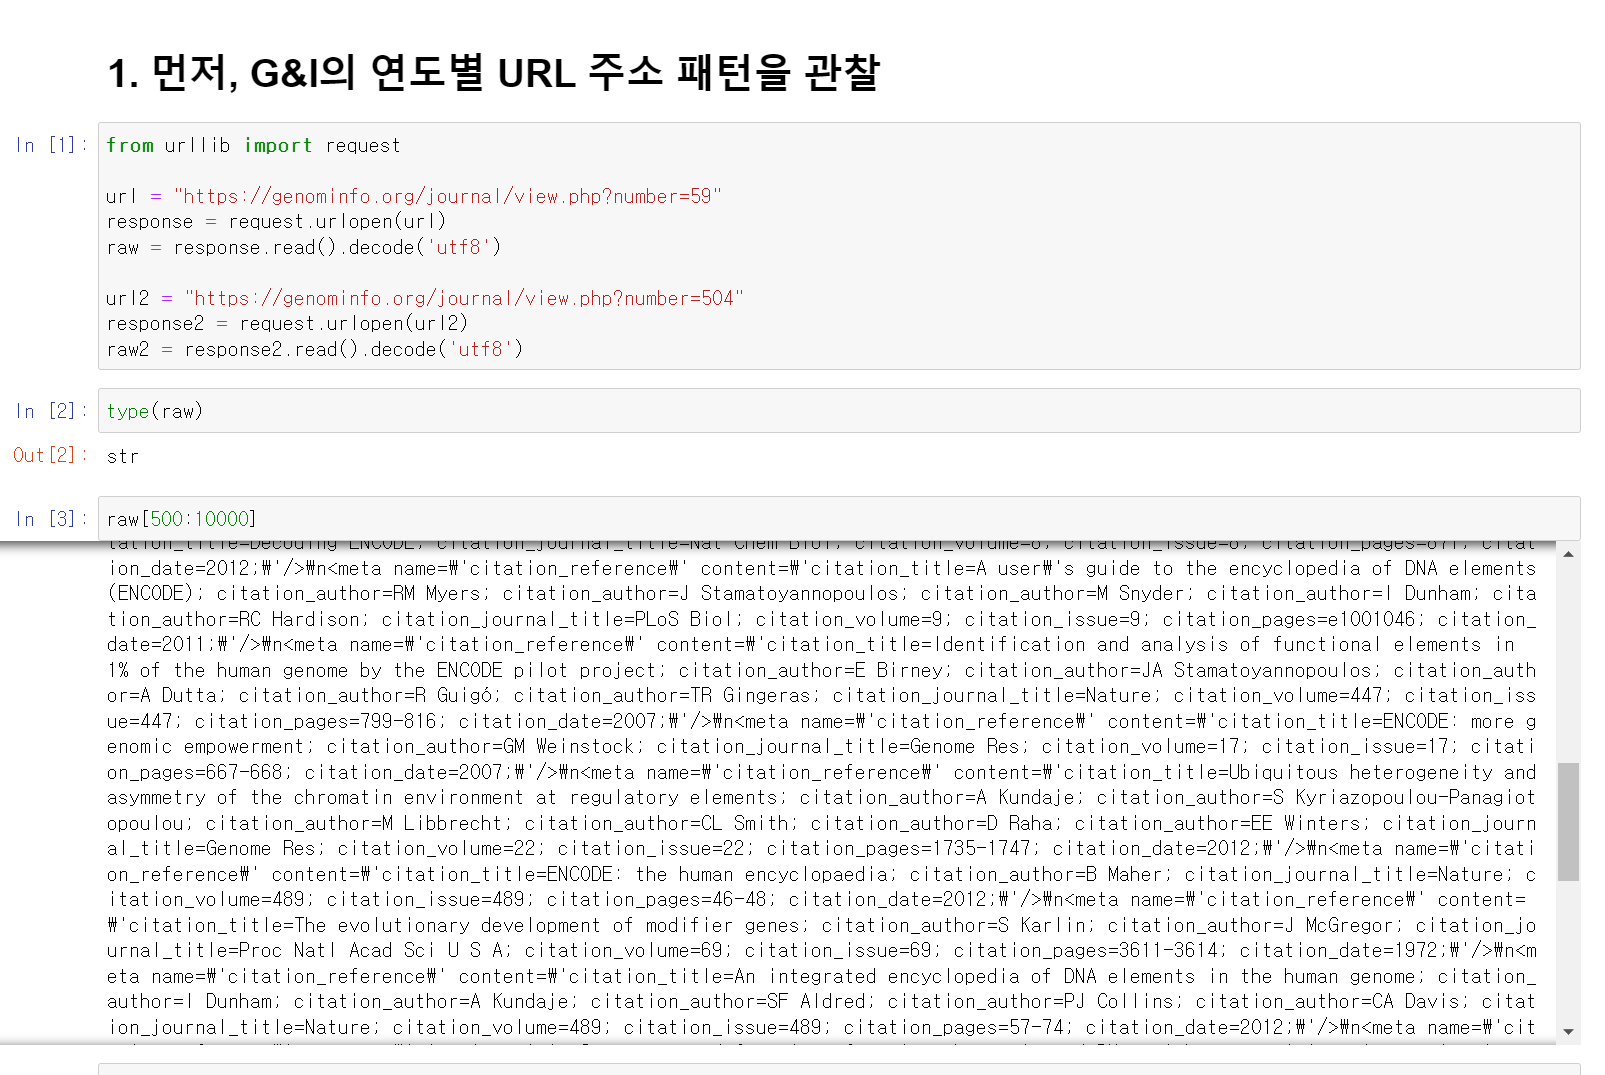

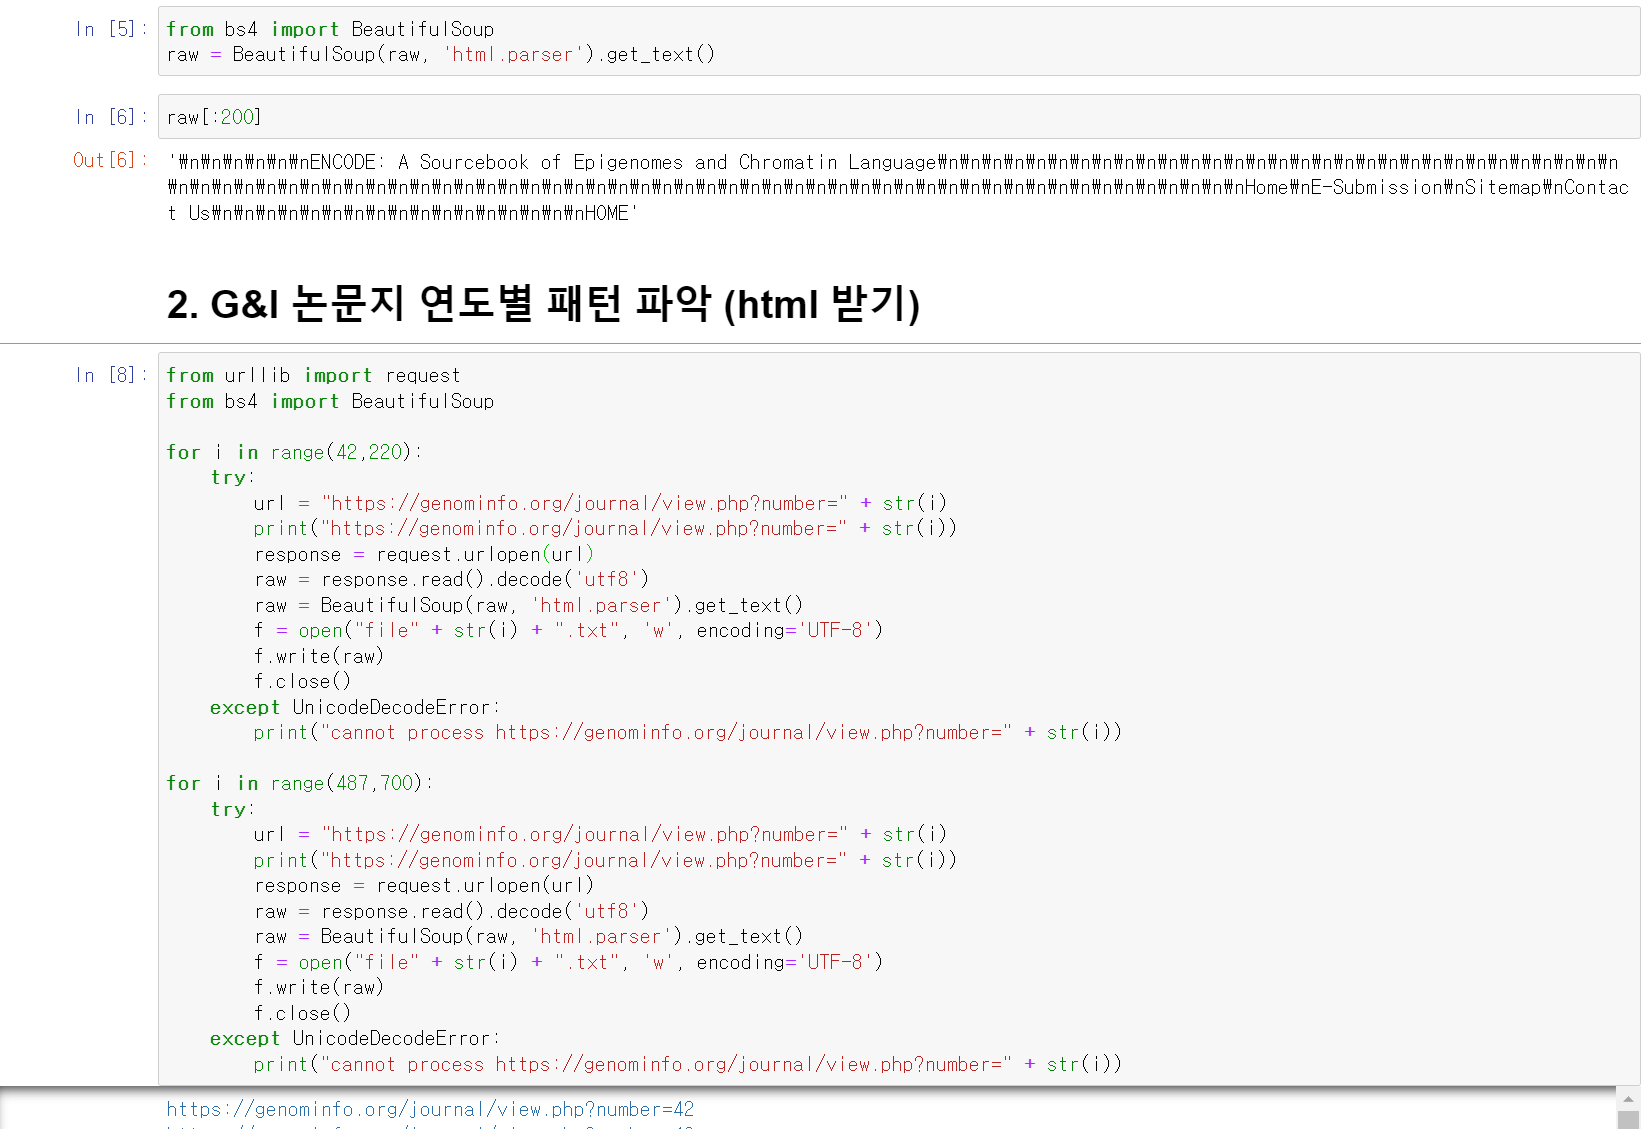

In [1]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = 'C:/gniWebScrapping'
GNICorpus = PlaintextCorpusReader(corpus_root, '.*')
GNICorpus.fileids()

['file100.txt',
 'file101.txt',
 'file102.txt',
 'file103.txt',
 'file104.txt',
 'file105.txt',
 'file106.txt',
 'file107.txt',
 'file108.txt',
 'file109.txt',
 'file110.txt',
 'file111.txt',
 'file112.txt',
 'file113.txt',
 'file114.txt',
 'file115.txt',
 'file116.txt',
 'file117.txt',
 'file118.txt',
 'file119.txt',
 'file120.txt',
 'file121.txt',
 'file122.txt',
 'file123.txt',
 'file124.txt',
 'file125.txt',
 'file126.txt',
 'file127.txt',
 'file128.txt',
 'file129.txt',
 'file130.txt',
 'file131.txt',
 'file132.txt',
 'file133.txt',
 'file134.txt',
 'file135.txt',
 'file136.txt',
 'file137.txt',
 'file138.txt',
 'file139.txt',
 'file140.txt',
 'file141.txt',
 'file142.txt',
 'file143.txt',
 'file144.txt',
 'file145.txt',
 'file146.txt',
 'file147.txt',
 'file148.txt',
 'file149.txt',
 'file150.txt',
 'file151.txt',
 'file152.txt',
 'file153.txt',
 'file154.txt',
 'file155.txt',
 'file156.txt',
 'file157.txt',
 'file158.txt',
 'file159.txt',
 'file160.txt',
 'file161.txt',
 'file16

In [2]:
import os
import nltk
import pandas as pd
import re

## 1. 연도별 관찰
이를 위해 각 파일의 이름을 작성 연도를 표시할 수 있도록 재작성하자.

우선, 각 txt별로 작성 연도의 표현 방법을 확인하자.

In [3]:
raw1 = GNICorpus.raw('file686.txt')
info = re.findall('Volume [0-9]{2}\([0-9]+\); [0-9]+', raw1)
info[0]

'Volume 19(4); 2021'

이제 위의 패턴을 확인했으니 일반화하여 파일명을 변경한다.

In [4]:
changed_files = []
for fileid in GNICorpus.fileids():
    try:
        raw = GNICorpus.raw(fileid) # n번 파일의 raw 저장
        vol_year_info = re.findall('[0-9]{2}\([0-9]+\); [0-9]+', raw) #vol번호와 작성 연도 추출
        lst = vol_year_info[0].split('; ')
        sliced_year_txt = lst[1]+ '_v' + lst[0][:2] + '_' + fileid[4:-4] +'.txt'  
        print(sliced_year_txt) #새로운 파일명
        original_root = 'C:/gniWebScrapping/{}'.format(fileid) #기존 파일 경로
        new_root = 'C:/gniWebScrapping/{}'.format(sliced_year_txt) #새로운 파일 경로 지정
        os.rename(original_root, new_root)
        
        changed_files.append(sliced_year_txt)
    except IndexError:
        print("IndexError in {}".format(fileid))

2014_v12_100.txt
2014_v12_101.txt
2014_v12_102.txt
2014_v12_103.txt
2014_v12_104.txt
2014_v12_105.txt
2014_v12_106.txt
2014_v12_107.txt
2014_v12_108.txt
2014_v12_109.txt
2014_v12_110.txt
2014_v12_111.txt
2014_v12_112.txt
2014_v12_113.txt
2014_v12_114.txt
2014_v12_115.txt
2014_v12_116.txt
2014_v12_117.txt
2014_v12_118.txt
2014_v12_119.txt
2014_v12_120.txt
2014_v12_121.txt
2014_v12_122.txt
2014_v12_123.txt
2014_v12_124.txt
2014_v12_125.txt
2014_v12_126.txt
2014_v12_127.txt
2014_v12_128.txt
2014_v12_129.txt
2014_v12_130.txt
2014_v12_131.txt
2014_v12_132.txt
2014_v12_133.txt
2014_v12_134.txt
2015_v13_135.txt
2015_v13_136.txt
2015_v13_137.txt
2015_v13_138.txt
2015_v13_139.txt
2015_v13_140.txt
2015_v13_141.txt
2015_v13_142.txt
2015_v13_143.txt
2015_v13_144.txt
2015_v13_145.txt
2015_v13_146.txt
2015_v13_147.txt
2015_v13_148.txt
2015_v13_149.txt
2015_v13_150.txt
2015_v13_151.txt
2015_v13_152.txt
2015_v13_153.txt
2015_v13_154.txt
2015_v13_155.txt
2015_v13_156.txt
2015_v13_157.txt
2015_v13_158.t

In [268]:
print(changed_files[:10])

['2014_v12_100.txt', '2014_v12_101.txt', '2014_v12_102.txt', '2014_v12_103.txt', '2014_v12_104.txt', '2014_v12_105.txt', '2014_v12_106.txt', '2014_v12_107.txt', '2014_v12_108.txt', '2014_v12_109.txt']


In [6]:
len(changed_files)

380

### 연도별로 Human Genes 단어 출현 빈도수를 파악해보자.

이를 위해 인간 유전자 리스트 xls 파일을 가져온다.  
https://www.kaggle.com/datasets/mohamedabdullah/human-genes?resource=download

In [11]:
import pandas as pd 
dataset = pd.read_csv('C:/Users/diana/인공지능의 이해/기말프로젝트/gni/humangenes.csv')
dataset

,id,shortName,FullName
0,1,AAAS,aladin WD repeat nucleoporin
1,2,AASS,aminoadipate-semialdehyde synthase
2,3,ABAT,4-aminobutyrate aminotransferase
3,4,ABCA1,ATP binding cassette subfamily A member 1
4,5,ABCA3,ATP binding cassette subfamily A member 3
...,...,...,...
1467,1468,ZFP57,ZFP57 zinc finger protein
1468,1469,ZFYVE26,zinc finger FYVE-type containing 26
1469,1470,ZIC2,Zic family member 2
1470,1471,ZMPSTE24,zinc metallopeptidase STE24


In [12]:
genes = []
for gene in dataset['shortName']:
    genes.append(gene)

In [13]:
print(genes)

['AAAS',
 'AASS',
 'ABAT',
 'ABCA1',
 'ABCA3',
 'ABCA4',
 'ABCA12',
 'ABCB4',
 'ABCB7',
 'ABCB11',
 'ABCC2',
 'ABCC6',
 'ABCC8',
 'ABCC9',
 'ABCD1',
 'ABCD4',
 'ABCG2',
 'ABCG5',
 'ABCG8',
 'ABHD5',
 'ABL1',
 'ACAD8',
 'ACAD9',
 'ACADM',
 'ACADS',
 'ACADSB',
 'ACADVL',
 'ACAN',
 'ACAT1',
 'ACE',
 'ACOX1',
 'ACP5',
 'ACSF3',
 'ACTA1',
 'ACTA2',
 'ACTB',
 'ACTG1',
 'ACTG2',
 'ACVR1',
 'ACVRL1',
 'ACY1',
 'ADA',
 'ADA2',
 'ADAMTS2',
 'ADAMTS10',
 'ADAMTS13',
 'ADAMTSL2',
 'ADAMTSL4',
 'ADAR',
 'ADCY5',
 'ADGRE2',
 'ADGRG1',
 'ADNP',
 'ADSL',
 'AFF2',
 'AFF4',
 'AGA',
 'AGL',
 'AGPAT2',
 'AGPS',
 'AGT',
 'AGTR1',
 'AGXT',
 'AHCY',
 'AHDC1',
 'AIP',
 'AIRE',
 'AKR1D1',
 'AKT1',
 'AKT3',
 'ALAD',
 'ALAS2',
 'ALDH3A2',
 'ALDH4A1',
 'ALDH5A1',
 'ALDH7A1',
 'ALDOB',
 'ALG1',
 'ALG6',
 'ALG12',
 'ALK',
 'ALMS1',
 'ALOX12B',
 'ALOXE3',
 'ALPL',
 'ALS2',
 'ALX1',
 'ALX3',
 'ALX4',
 'AMACR',
 'AMELX',
 'AMER1',
 'AMH',
 'AMHR2',
 'AMN',
 'AMPD1',
 'AMT',
 'ANK1',
 'ANK2',
 'ANKH',
 'ANKRD11',
 'ANO

In [14]:
len(genes)

1472

연도가 동일한 문서들을 하나로 합쳐보자

In [25]:
corpus_root = 'C:/gniWebScrapping'
yearCorpus = PlaintextCorpusReader(corpus_root, '.*')

In [26]:
for fileid in yearCorpus.fileids():
    if len(fileid) >= 15:
        raw = yearCorpus.raw(fileid)
        year = fileid[:4]
        filename = year + ".txt"
        f = open(filename, "a", encoding='UTF-8')
        f.write(raw)
        f.close()

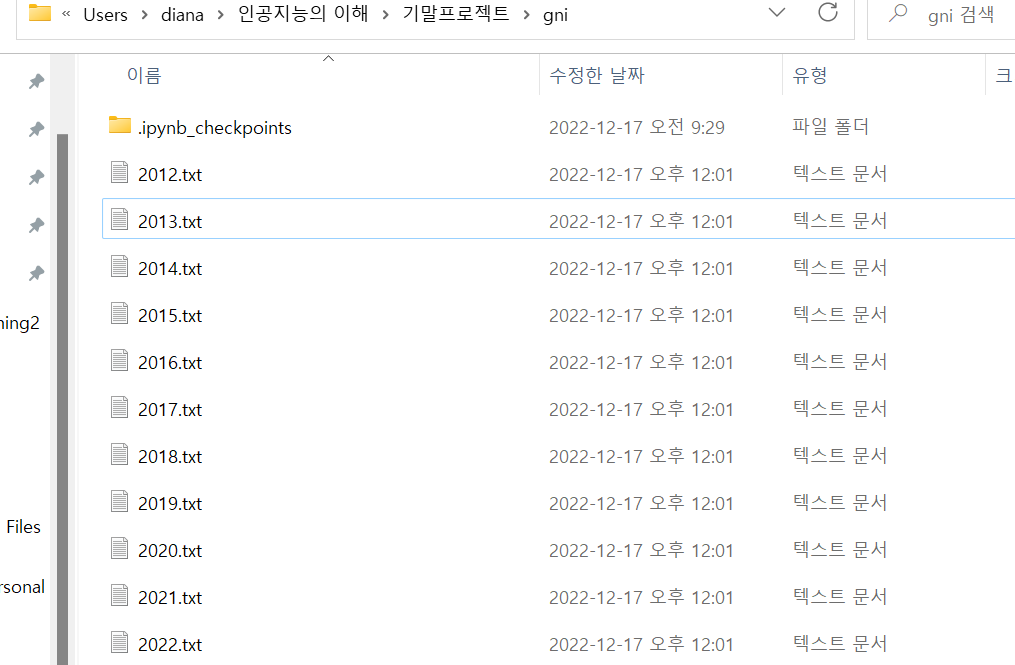

In [28]:
yearCorpus2 = PlaintextCorpusReader('C:/Users/diana/인공지능의 이해/기말프로젝트/gni', '.*.txt')

In [42]:
yearCorpus2.words('2012.txt')

['Alternative', 'Splicing', 'and', 'Its', 'Impact', ...]

In [45]:
string =""
for f in yearCorpus2.fileids():
    raw = yearCorpus2.raw(f)
    string += raw

In [49]:
wordlist = string.split()

stopwords = nltk.corpus.stopwords.words('english')

In [52]:
wordfreq = []
for w in wordlist:
    if w in genes:
        wordfreq.append(wordlist.count(w))
pairs = list(zip(genes, wordfreq)) #(유전자명, 빈도수) 튜플 생성
print(pairs)

[('AAAS', 2),
 ('AASS', 33),
 ('ABAT', 3),
 ('ABCA1', 53),
 ('ABCA3', 53),
 ('ABCA4', 53),
 ('ABCA12', 53),
 ('ABCB4', 33),
 ('ABCB7', 2),
 ('ABCB11', 33),
 ('ABCC2', 3),
 ('ABCC6', 4),
 ('ABCC8', 37),
 ('ABCC9', 53),
 ('ABCD1', 33),
 ('ABCD4', 53),
 ('ABCG2', 33),
 ('ABCG5', 37),
 ('ABCG8', 3),
 ('ABHD5', 4),
 ('ABL1', 1),
 ('ACAD8', 18),
 ('ACAD9', 3),
 ('ACADM', 3),
 ('ACADS', 6),
 ('ACADSB', 1),
 ('ACADVL', 3),
 ('ACAN', 3),
 ('ACAT1', 1),
 ('ACE', 6),
 ('ACOX1', 6),
 ('ACP5', 6),
 ('ACSF3', 3),
 ('ACTA1', 3),
 ('ACTA2', 3),
 ('ACTB', 4),
 ('ACTG1', 3),
 ('ACTG2', 4),
 ('ACVR1', 3),
 ('ACVRL1', 3),
 ('ACY1', 6),
 ('ADA', 6),
 ('ADA2', 1),
 ('ADAMTS2', 6),
 ('ADAMTS10', 24),
 ('ADAMTS13', 37),
 ('ADAMTSL2', 37),
 ('ADAMTSL4', 37),
 ('ADAR', 24),
 ('ADCY5', 6),
 ('ADGRE2', 37),
 ('ADGRG1', 2),
 ('ADNP', 6),
 ('ADSL', 3),
 ('AFF2', 33),
 ('AFF4', 1),
 ('AGA', 52),
 ('AGL', 79),
 ('AGPAT2', 52),
 ('AGPS', 52),
 ('AGT', 19),
 ('AGTR1', 52),
 ('AGXT', 19),
 ('AHCY', 52),
 ('AHDC1', 19),


In [66]:
#top 30 GENES' NAMES
top30pairs = sorted(pairs, key=lambda x: x[1], reverse = True)[:30]
top30genes = [ g[0] for g in top30pairs]
print(top30genes)

['CLCN7', 'FGFR1', 'FLT4', 'PGAM2', 'PGAP2', 'AGL', 'BCHE', 'BRAF', 'C8A', 'C9orf72', 'CACNA1D', 'CACNA1S', 'CACNB4', 'CALR', 'CARD9', 'CARD14', 'CASQ2', 'CASR', 'CBFB', 'CCND2', 'CDC6', 'CDC73', 'CDH1', 'CDH23', 'CHM', 'CHRNB2', 'COLQ', 'GALNT3', 'LCT', 'LRP5']


In [67]:
cfd = nltk.ConditionalFreqDist((target, fileid[:-4])
                              for target in top30genes
                              for fileid in yearCorpus2.fileids()
                              for w in yearCorpus2.words(fileid)
                              if w.startswith(target))

In [68]:
cfd.tabulate()

       2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 
  BRAF    0   22    1    0    4    3    7    2    2   41    0 
CACNB4    0    3    0    0    0    0    0    0    0    0    0 
  CBFB    0    0    0    1    0    0    0    0    0    0    0 
 CCND2    0    0    0    0    0    0    0    0    3    0    0 
  CDC6    0    0    0    0    0    0    0    0    0    3    0 
  CDH1    1    2    2    0    3    2    6    1    0   18    0 
 CDH23    0    4    0    0    0    0    4    0    0    0    1 
   CHM    0    0    0    0    0    0    0    0    0    1    0 
 FGFR1    0    0    0    0    3    2    3    0    0    2    2 
  FLT4    0    0    0    0    4    0    0    0    0    0    0 
GALNT3    0    0    3    0    0    0    0    0    0    0    0 
  LRP5    0    0    0    0   19    0    0    0    0    0    2 


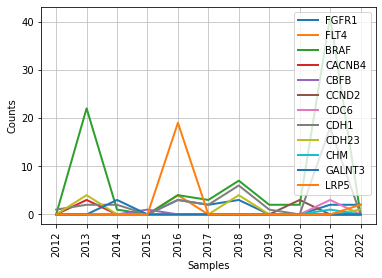

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [69]:
cfd.plot() #연도별로 어떤 유전자가 많이 언급되었는지 관찰가능함.

In [76]:
#stopwords를 추후 제거하기 위해 미리 불러온다.
stopwords = nltk.corpus.stopwords.words('english')
#from nltk.stem.snowball import SnowballStemmer
#stemmer = SnowballStemmer("english")

In [77]:
# lemmatize 이용하기
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [71]:
new_corpus = []
for fileid in yearCorpus.fileids():
    temp = []
    if fileid in changed_files:
        lst = yearCorpus.words(fileid)
        for word in lst:
            if word not in stopwords:
                    temp.append(word)
        new_corpus.append(' '.join(temp))

In [98]:
print(new_corpus[1])

"Editor ' Introduction This Issue Home E - Submission Sitemap Contact Us HOME ABOUT Aims Scope Journal catalog Editorial Board Best Practice Open Access Policy Contact us ARTICLE CATEGORY Original Article Review Article Editorial Application Note Brief Communication Clinical Genomics Genomic archive Research Communication Opinion Others Browse articles > BROWSE ARTICLES New Issue All Issues Most View Most Download Most Cited Funded Articles Genomics Inform Search Author Index FOR CONTRIBUTORS Instructions Authors Guideline Reviewers Publication Ethics Author ’ Checklist E - Submission Article - processing Charge Copyright Transfer Agreement Search Genomics Inform Search CLOSE Genomics Inform > Volume 11 ( 1 ); 2013 > Article Kim : Editor ' Introduction This Issue Editorial Genomics & Informatics 2013 ; 11 ( 1 ): 1 . Published online : March 31 , 2013 DOI : https :// doi . org / 10 . 5808 / GI . 2013 . 11 . 1 . 1 Editor ' Introduction This Issue Sangsoo Kim School Systems Biomedical Sci

In [74]:
filenames = [f[:-4] for f in changed_files]

In [75]:
document_df = pd.DataFrame({'filename':filenames,'opinion_text':new_corpus})
document_df

,filename,opinion_text
0,2014_v12_100,Alternative Splicing Its Impact Cancer Diagnos...
1,2014_v12_101,Editor ' Introduction This Issue Home E - Subm...
2,2014_v12_102,Analytical Tools Databases Metagenomics Next -...
3,2014_v12_103,Genome - Wide Association Study Orthostatic Hy...
4,2014_v12_104,Comparative Viral Metagenomics Environmental S...
...,...,...
375,2014_v12_95,Whole - genome sequence analysis online web in...
376,2014_v12_96,Designing novel mRNA vaccine Vibrio harveyi in...
377,2014_v12_97,Publication trends somatic mutation recombinat...
378,2014_v12_98,Presentation potential genes deleterious varia...


## 2. 군집화를 위한 데이터 전처리 과정

### 2-1. 단어 추출 과정  
(처음에 stemmer으로 시도했으나 단어가 심히 훼손되어 lemmatizer로 재작성하였음.)

In [78]:
def tokenize_and_lemmatize(text):
    tokens  = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('^[a-zA-z]+$',token):
            filtered_tokens.append(token)
        if re.search('^[a-zA-z]+[0-9]+$',token):
            filtered_tokens.append(token)
        if re.search('^[0-9]+[a-zA-z]+$',token):
            filtered_tokens.append(token)
    lemmas = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lemmas

def tokenize_only(text):
    tokens  = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('^[a-zA-z]+$',token):
            filtered_tokens.append(token)
        if re.search('^[a-zA-z]+[0-9]+$',token):
            filtered_tokens.append(token)
        if re.search('^[0-9]+[a-zA-z]+$',token):
            filtered_tokens.append(token)
    return filtered_tokens

In [80]:
totalvocab_lemmatized = []
totalvocab_tokenized = []
for i in new_corpus:
    allwords_lemmatized = tokenize_and_lemmatize(i) #for each item in 'synopses', tokenize/stem
    totalvocab_lemmatized.extend(allwords_lemmatized) #extend the 'totalvocab_stemmed' list
 
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [81]:
len(totalvocab_lemmatized), len(totalvocab_tokenized)

(1102443, 1102443)

In [82]:
# 추출된 단어 출력
print(totalvocab_lemmatized[:20])
print(totalvocab_tokenized[:20])

['alternative', 'splicing', 'it', 'impact', 'cancer', 'diagnostic', 'marker', 'home', 'e', 'submission', 'sitemap', 'contact', 'u', 'home', 'about', 'aim', 'scope', 'journal', 'catalog', 'editorial']
['Alternative', 'Splicing', 'Its', 'Impact', 'Cancer', 'Diagnostic', 'Marker', 'Home', 'E', 'Submission', 'Sitemap', 'Contact', 'Us', 'HOME', 'ABOUT', 'Aims', 'Scope', 'Journal', 'catalog', 'Editorial']


In [84]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_lemmatized)

In [86]:
#there are 1102443 items in vocab_frame
vocab_frame.shape[0]

1102443

In [89]:
vocab_frame = pd.DataFrame({'words': totalvocab_lemmatized}, index = totalvocab_tokenized)

vocab_frame.head(25)

,words
Alternative,alternative
Splicing,splicing
Its,it
Impact,impact
Cancer,cancer
Diagnostic,diagnostic
Marker,marker
Home,home
E,e
Submission,submission


In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                   min_df=0.2,
                                   stop_words = 'english',
                                   use_idf=True, 
                                   tokenizer=tokenize_and_lemmatize,
                                   ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(new_corpus) 


CPU times: total: 22.2 s
Wall time: 22.2 s
(380, 1016)


In [210]:
print(tfidf_matrix.shape)
print(tfidf_matrix.toarray()[:1])

(380, 1016)
[[0.         0.         0.00734507 ... 0.00700246 0.00703492 0.        ]]


In [99]:
terms = tfidf_vectorizer.get_feature_names_out()

In [101]:
terms[:50]

array(['1department', '2department', '[ ] addition', '[ ] study',
       '] addition', '] study', '] used', '``', 'aa', 'able', 'ac',
       'ac kr', 'ac kr received', 'acad', 'acad sci', 'acad sci u',
       'access article', 'access article distributed', 'access http',
       'access http creativecommons', 'accessed', 'according', 'accuracy',
       'accurate', 'acid', 'acknowledgment', 'acknowledgment work',
       'acknowledgment work supported', 'acquisition', 'activation',
       'active', 'activity', 'addition', 'additional', 'advance',
       'advanced', 'advantage', 'affect', 'affected', 'age', 'aj', 'al [',
       'al [ ]', 'al genome', 'algorithm', 'alignment', 'allele',
       'allows', 'alteration', 'alternative'], dtype=object)

In [100]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

# 3-1. K-means clustering

In [260]:
from sklearn.cluster import KMeans
num_clusters = 4

model = KMeans( n_clusters=num_clusters)
model.fit(tfidf_matrix)

KMeans(n_clusters=4)

In [261]:
clusters = model.labels_.tolist()

In [262]:
years = [ int(f[:4]) for f in filenames]

In [263]:
df = pd.DataFrame({'filename':filenames, 'text':new_corpus, 'year':years, 'cluster':clusters})

In [264]:
df

,filename,text,year,cluster
0,2014_v12_100,Alternative Splicing Its Impact Cancer Diagnos...,2014,2
1,2014_v12_101,Editor ' Introduction This Issue Home E - Subm...,2014,3
2,2014_v12_102,Analytical Tools Databases Metagenomics Next -...,2014,3
3,2014_v12_103,Genome - Wide Association Study Orthostatic Hy...,2014,0
4,2014_v12_104,Comparative Viral Metagenomics Environmental S...,2014,2
...,...,...,...,...
375,2014_v12_95,Whole - genome sequence analysis online web in...,2014,3
376,2014_v12_96,Designing novel mRNA vaccine Vibrio harveyi in...,2014,1
377,2014_v12_97,Publication trends somatic mutation recombinat...,2014,3
378,2014_v12_98,Presentation potential genes deleterious varia...,2014,2


In [265]:
df['cluster'].value_counts()

3    165
2    100
0     68
1     47
Name: cluster, dtype: int64

In [266]:
grouped = df['year'].groupby(df['cluster'])
grouped.mean()

cluster
0    2016.779412
1    2017.276596
2    2016.600000
3    2017.866667
Name: year, dtype: float64

#### cluster 0, 2 = 2016년 많음 / cluster 1, 3 = 2017년 많음


In [158]:
terms[1]

'2department'

In [159]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_lemmatized)
vocab_frame.shape[0]#items in vocab_frame

1102443

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


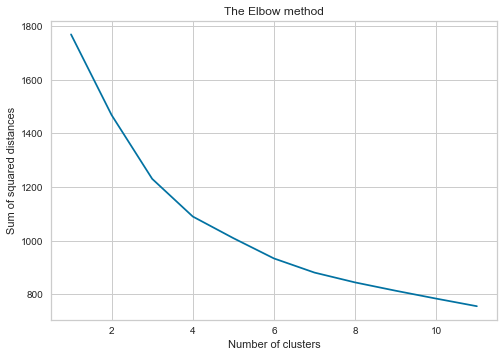

In [132]:
wss=[]
for i in range(1,12):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(dist)
    wss.append(kmeans.inertia_)
    
plt.plot(range(1,12), wss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


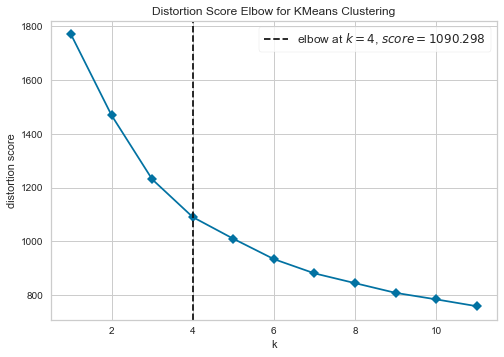

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [131]:
#pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12), timings = False)
visualizer.fit(dist)
visualizer.show()

In [130]:
from sklearn.metrics import silhouette_score

for i in range(2,12):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(dist)
    score = silhouette_score(dist, kmeans.labels_)
    print("For cluster: {}, the silhouette score is: {}".format(i,score))

For cluster: 2, the silhouette score is: 0.1608771269458086
For cluster: 3, the silhouette score is: 0.1905827704309086
For cluster: 4, the silhouette score is: 0.20447795617420525
For cluster: 5, the silhouette score is: 0.18383017159320722
For cluster: 6, the silhouette score is: 0.19566379805800088
For cluster: 7, the silhouette score is: 0.18896148017672404
For cluster: 8, the silhouette score is: 0.18671598661394523
For cluster: 9, the silhouette score is: 0.174042540248066
For cluster: 10, the silhouette score is: 0.19227604328341286
For cluster: 11, the silhouette score is: 0.17630664926002104


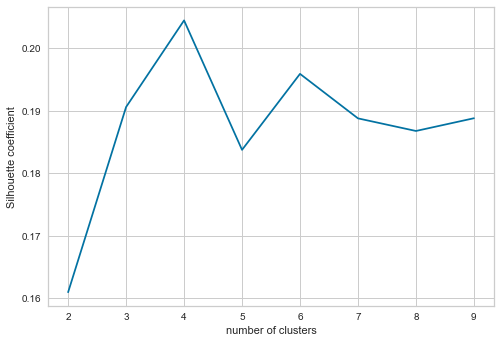

In [113]:
silhouette_coefficients = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(dist)
    score = silhouette_score(dist, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2,10), silhouette_coefficients)
plt.xticks(range(2,10))
plt.xlabel("number of clusters")
plt.ylabel("Silhouette coefficient")
plt.show()

#### 위 통계 결과를 통해 cluster의 개수는 4로 하는 것이 적절할 것임을 확증할 수 있다.

In [160]:
from __future__ import print_function
print("Top terms per cluster:")
print()

#sort cluster centers by proximity to centroid
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

for i in range(num_clusters):#5
    print("Cluster %d words:" % i, end='') 
    for ind in order_centroids[i, :8]: #replace 8 With n words per cluster
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore').decode(), end=',')
    print() 
    print() 

Top terms per cluster:

Cluster 0 words: annotations, sequences, sequencing, DNA, read, species, Fig, Biomedical,

Cluster 1 words: proteins, structure, PMID, binding, Drug, interactions, models, Acids,

Cluster 2 words: SNPs, association, PMID, populations, Korean, traits, variants, genetic,

Cluster 3 words: Cancer, cell, PMID, expression, mutations, tumors, RNA, patient,



### Multidimensional scaling

https://blog.naver.com/cslee_official/222735934384

In [161]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import MDS

In [162]:
MDS()
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

### Visualizing document clusters

In [163]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a'}

In [164]:
cluster_names = {0: 'cluster 0',
                1: 'cluster 1',
                2: 'cluster 2',
                3: 'cluster 3'}

In [165]:
%matplotlib inline
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title = filenames))

In [166]:
df

,x,y,label,title
0,0.489485,0.242332,3,2014_v12_100
1,-0.661365,0.139757,0,2014_v12_101
2,0.161948,-0.019588,0,2014_v12_102
3,-0.145243,-0.500534,2,2014_v12_103
4,0.206088,-0.064353,3,2014_v12_104
...,...,...,...,...
375,-0.193823,0.129005,0,2014_v12_95
376,0.353362,-0.259329,1,2014_v12_96
377,0.634980,0.254424,0,2014_v12_97
378,0.095608,-0.147449,3,2014_v12_98


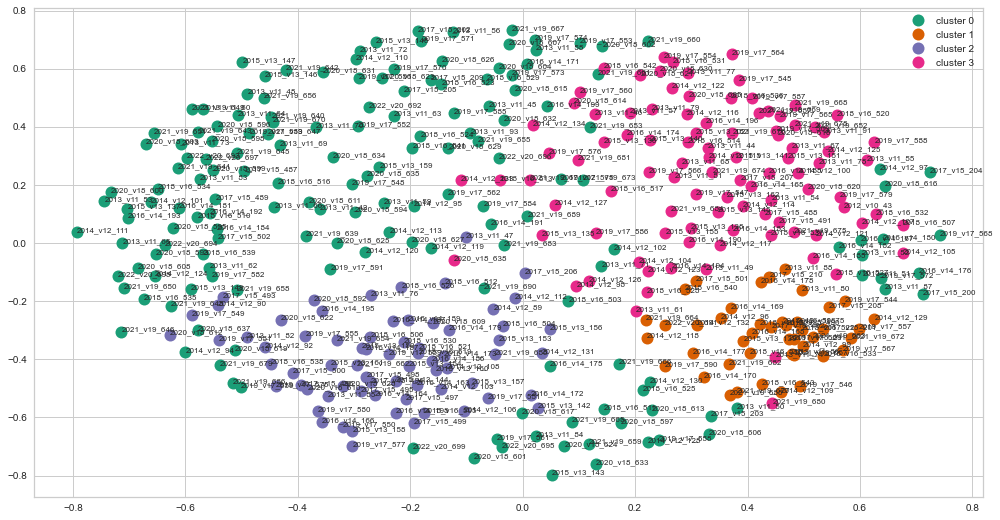

In [167]:
groups = df.groupby('label')
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,label=cluster_names[name], color=cluster_colors[name],mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis= 'x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off', top='off', labelleft='off')
ax.legend(numpoints=1)
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8) 

    
plt.show() #show the plo

In [168]:
plt.close()

# 3-2. Hierarchical document clustering

In [169]:
from scipy.cluster.hierarchy import ward, dendrogram

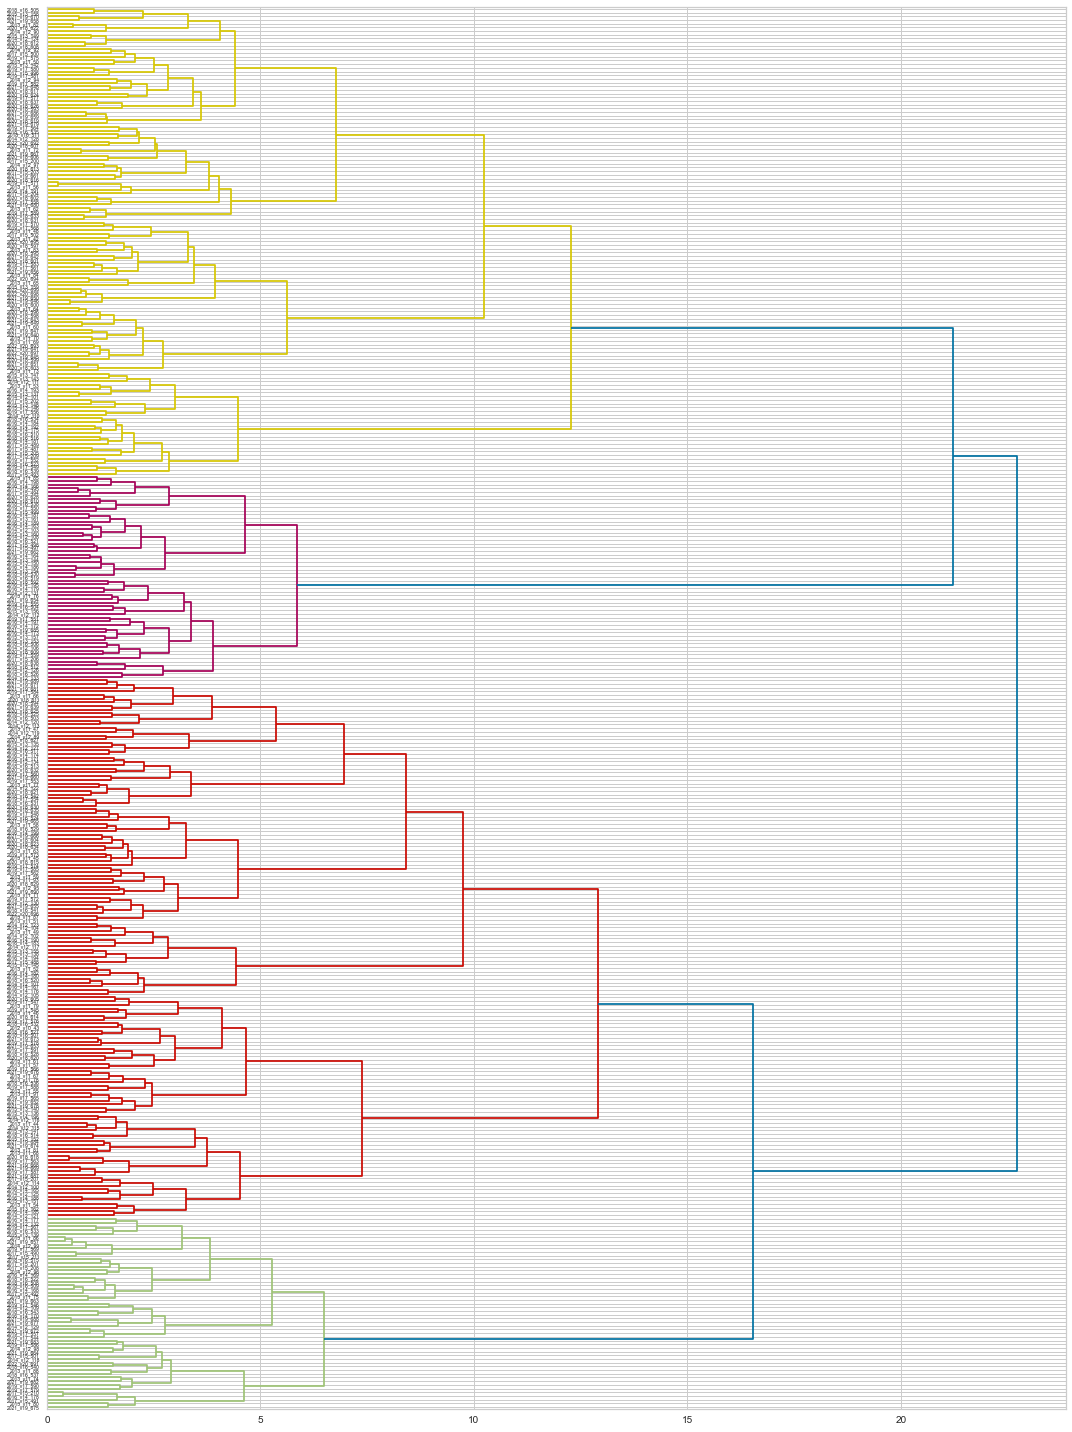

In [171]:
linkage_matrix = ward(dist)

fig, ax = plt.subplots(figsize=(15, 20)) 
ax = dendrogram(linkage_matrix, orientation="right", labels=filenames)

plt.tick_params(axis= 'x',which='both',bottom='off',top='off',labelbottom='off')

plt.tight_layout()
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters


In [172]:
plt.close()

# 3-3. Wordcloud

In [173]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [174]:
def frequencies_dict(cluster_index):
    if cluster_index > true_k - 1:
        return
    term_frequencies = model.cluster_centers_[cluster_index]
    sorted_terms = order_centroids[cluster_index]
    frequencies = {terms[i]: term_frequencies[i] for i in sorted_terms}
    return frequencies

In [175]:
def makeImage(frequencies):

    wc = WordCloud(background_color="white", max_words=50)
    # generate word cloud
    wc.generate_from_frequencies(frequencies)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

cluster 0


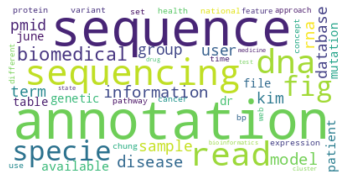


cluster 1


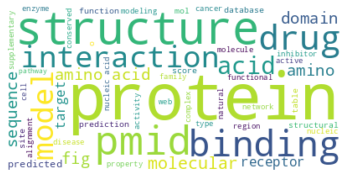


cluster 2


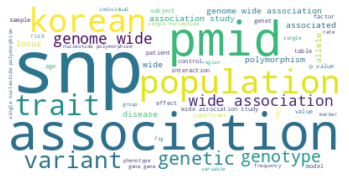


cluster 3


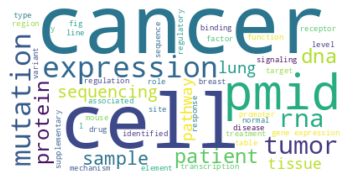

In [176]:
import numpy as np
labels = terms
true_k = len(np.unique(labels))
for i in range(4):
    freq = frequencies_dict(i)
    print(f'cluster {i}')
    makeImage(freq)
    print()

# 4. 결과 분석

### <1> Cluster 1, 2 words (2017 most, BRAF mentioned most):
proteins, structure, PMID, binding, Drug, interactions, models, Acids,  SNPs, association, PMID, populations, Korean, traits, variants, genetic

#### BRAF gene

1. B-Raf is a member of the Raf kinase family of growth signal transduction **protein** kinases. This protein plays a role in regulating the MAP kinase/ERKs signaling pathway, which affects cell division, differentiation, and secretion  

2. "**Genomic analysis of BRAF** was **initiated** with SIFT followed by PolyPhen and SNPs&GO servers **to retrieve the 85 deleterious non-synonymous SNPs** (nsSNPs) from dbSNP. " (해석: BRAF의 게놈 분석은 DbSNP에서 85개의 유해한 비동의어 SNP(nsSNP)를 검색하기 위해 SIFT와 PolyPhen 및 SNP&GO 서버로 시작되었다.)

3. "By comparison between 2 methods to **detect SNPs in the BRAF gene**..."

- cluster 1,2에서 빈도수 높게 언급되었던 단어 'protein', 'SNPs'는 위와 같은 근거로 BRAF 유전자와 연관성이 높다. 
- 이를 통해 2017년의 논문들에서 BRAF 유전자가 비교적 자주 다루어졌음을 추측할 수 있고, 연도별 (K-means) clustering과 top 유전자들에 관한 통계가 비교적 유의미함을 알 수 있다.

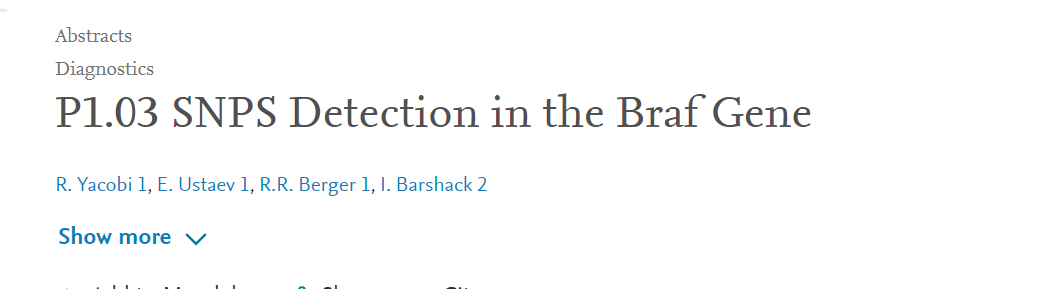

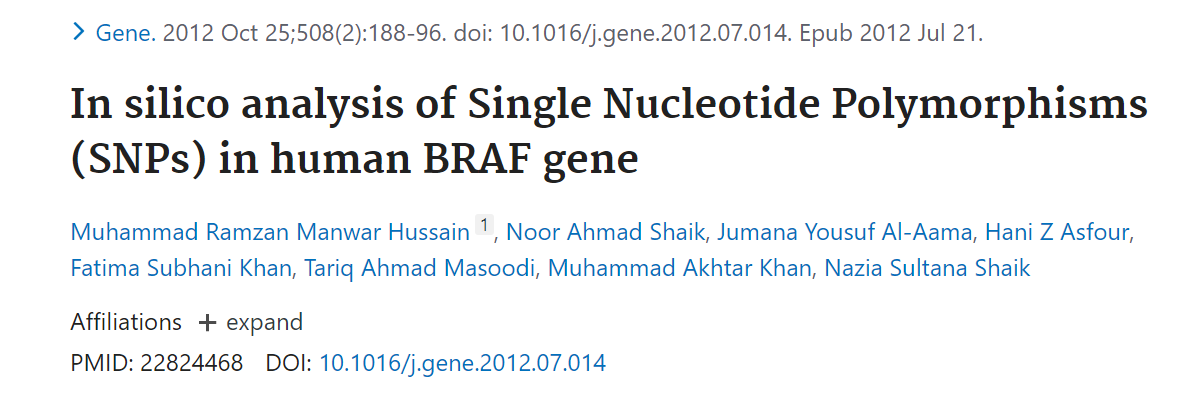

(출처 : https://en.wikipedia.org/wiki/BRAF_(gene)#Function  
,  https://pubmed.ncbi.nlm.nih.gov/22824468/ , https://www.sciencedirect.com/science/article/pii/S0923753420312941 )

### <2> Cluster 0, 3words (2016 most, FLT4 mentioned most): 
annotations, sequences, sequencing, DNA, read, species, Fig, Biomedical,  Cancer, cell, PMID, expression, mutations, tumors, RNA, patient  

#### FLT4 gene  
- FMS 관련 티로신 키네이스 4() 또는 FLT4는 인간에서 FLT4 유전자에 의해 암호화되는 단백질이다. 이 유전자는 혈관 내피 성장 인자 C 및 D에 대한 티로신 키네이스 수용체를 암호화한다. 이 단백질은 림프관 형성과 림프 내피의 유지에 관여하는 것으로 생각된다. 이 유전자의 돌연변이는 유전성 림프부종 IA형을 유발한다.  
https://en.wikipedia.org/wiki/FLT4

- 2016년에 작성된 논문 중에 가장 많이 언급된 단어들의 집합에는 **'mutations(돌변변이)'**가 포함되어있다.  

- 이는 FLT4 유전자의 돌연변이의 문제점에 대해 작성할때 언급되었을 것으로 추측 가능하다.   뿐만 아니라 2016년에 FLT4 유전자에 관한 연구가 많이 이루어졌을 것이라고 추측해볼 수 있다.